# Goal: Examine twitter metrics over time 

Visualize a user tweets' retweets & likes over time and compute their average.

### Step 1: Look at Beto's recent tweets and their number of retweets. Visualize this information. 
Status Object: https://www.geeksforgeeks.org/python-status-object-in-tweepy/

In [102]:
#All libraries that I might need
import tweepy
import time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

#put your information in
consumer_key = "XXXXXXXXX"
consumer_secret = "XXXXXXXXX"
access_token = "XXXXXXXXX"
access_token_secret = "XXXXXXXXX"

In [103]:
#initialize api
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

#beto user info, replace with your user's information
beto_id = '342863309'
beto_user = "@BetoORourke"

In [104]:
#pull tweet information with these basic functions

def list_of_tweets(user_id, num_tweets):
    """
    user_id, string with numbers to represent a user id
    num_tweets, integer to represent number of tweets
        no matter the num you put, the max will be 200
        
    returns a list of tweets
    """
    return api.user_timeline(user_id = '342863309', count = num_tweets)

def tweet_info(tweets):
    """
    tweets should be a list of tweets 
        (ex: tweets generated from func list_of_tweets)
    returns panda dataframe of tweets, their id, and the tweet itself
    """
    lst = [[tweet.created_at, tweet.id, tweet.text] for tweet in tweets]
    df = pd.DataFrame(lst)
    df.columns = [["Created_At", "Id", "Text"]]
    return df

def num_retweets(tweets):
    """
    tweets should be a list of tweets 
        (ex: tweets generated from func list_of_tweets)
    returns panda dataframe of tweets, 
        their id, the tweet itself, and number of retweets the tweet recieved
    """
    lst = [[tweet.created_at, tweet.id, tweet.text, tweet.retweet_count] for tweet in tweets]
    df = pd.DataFrame(lst)
    df.columns = [["Created_At", "Id", "Text", "Retweets"]]
    return df
    
def num_likes(tweets):
    """
    tweets should be a list of tweets 
        (ex: tweets generated from func list_of_tweets)
    returns panda dataframe of tweets, 
        their id, the tweet itself, and number of likes the tweet recieved
    """
    lst = [[tweet.created_at, tweet.id, tweet.text, tweet.favorite_count] for tweet in tweets]
    df = pd.DataFrame(lst)
    df.columns = [["Created_At", "Id", "Text", "Likes"]]
    return df

def average(df, column):
    """
    Find the average of a column in a dataframe
    """
    return int(df[column].mean())

In [105]:
#beto's retweets
list_tweets = list_of_tweets(beto_id,1000)
rts = num_retweets(list_tweets)
print(average(rts,"Retweets"))
rts.head() #200 tweets, covers about the span of a month

,Created_At,Id,Text,Retweets
0,2022-06-30 00:56:22+00:00,1542311045183819777,It’s time for Texas to have a governor who car...,524
1,2022-06-29 22:37:34+00:00,1542276115082911749,This is a campaign to ensure that women have t...,584
2,2022-06-29 19:52:18+00:00,1542234523949273091,RT @nowthisnews: Watch Beto O’Rourke play Guns...,376
3,2022-06-29 17:40:07+00:00,1542201258823585793,"Under Abbott, Texas ranks LAST in access to me...",654
4,2022-06-29 15:01:02+00:00,1542161223164350465,Honored to receive the 2022 @MomsDemand Gun Se...,848


In [106]:
#visualize data without dates
    #df.iat[row,column]

def create_xy_list(df, x_col, y_col):
    """
    df - pandas dataframe
    x_col - 
        - string w name of the column at the x_axis
        - None (will enumerate from 1 to number of rows in df for x_axis)
    y_col - string w name of the column at the y_axis
    
    returns x_lst, y_lst with lists to make your plot
    """
    #find number of rows
    num_rows = len(df.index)
    
    if x_col == None:
        x_lst = list(range(1, num_rows + 1))

    else:
        #create dataframes to loop through easily,
        #both dataframes will have one column and num_rows rows
        x_df = df[x_col]
        x_lst = []
        for i in range(num_rows):
            x_lst.append(x_df.iat[i,0])  
    
    y_df = df[y_col]
    y_lst = []
    for i in range(num_rows):
        y_lst.append(y_df.iat[i,0])
        
    return x_lst, y_lst
    
#print(rts.iat[3,0])
#print(create_xy_list(rts, None, "Retweets"))
#print(create_xy_list(rts, "Created_At", "Retweets"))

plot_date documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot_date.html

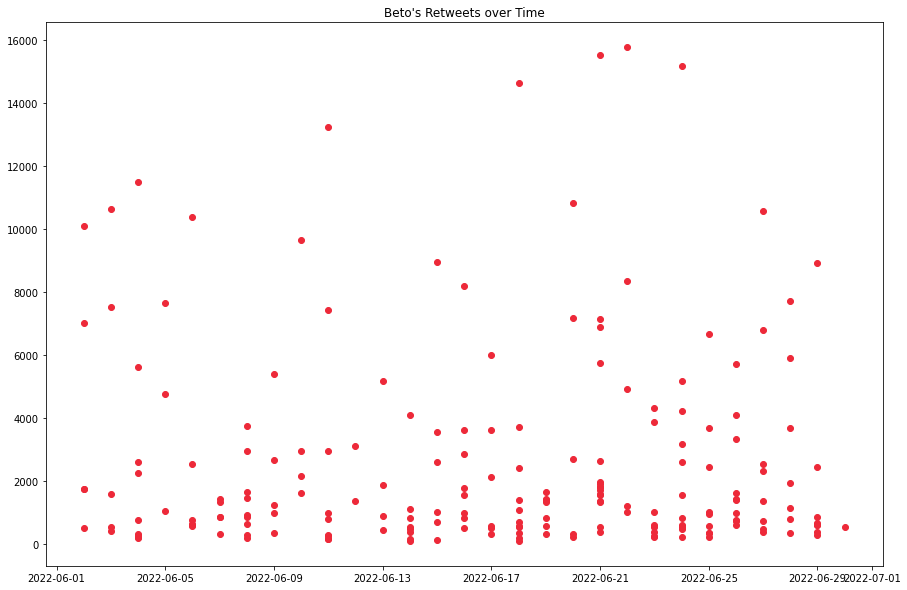

In [108]:
def dated_plot(title, df, x_col, y_col, l, col, av):
    """
    NOTE: x_col MUST BE DATES as timestamp objects
        #it is okay for dates to repeat
    title: string w title of plot
    line: 'dashed', line, other line type, or None
    col: hex code w desired color
    Returns a dated plot with dates as x and vals as y
    """
    x_lst, y_lst = create_xy_list(df, x_col, y_col)
    
    #currently they are timestamp objects, we need to represent as datetime object
    dates_lst = []
    for i in x_lst:
        #print(i)
        dates_lst.append(i.date())
    
    plt.title(title)
    
    if av:
        a = average(df, y_col)
        plt.axhline(y=a, color='grey', linestyle='dashed', label = ("Average: " + str(a)))
        plt.legend()
    
    if l == None:
        plt.plot_date(dates_lst, y_lst, 'o', color = col)
    else:
        plt.plot_date(dates_lst, y_lst, marker = 'o', linestyle = l, color = col)

#dated_plot("Beto's Retweets over Time", rts, "Created_At", "Retweets", 'dashed', '#ED2939', False)
dated_plot("Beto's Retweets over Time", rts, "Created_At", "Retweets", None, '#ED2939', True)

#to save the file
#plt.savefig("/Users/sejalgupta/Documents/BETO WORK/twitter/rts_time.jpg")

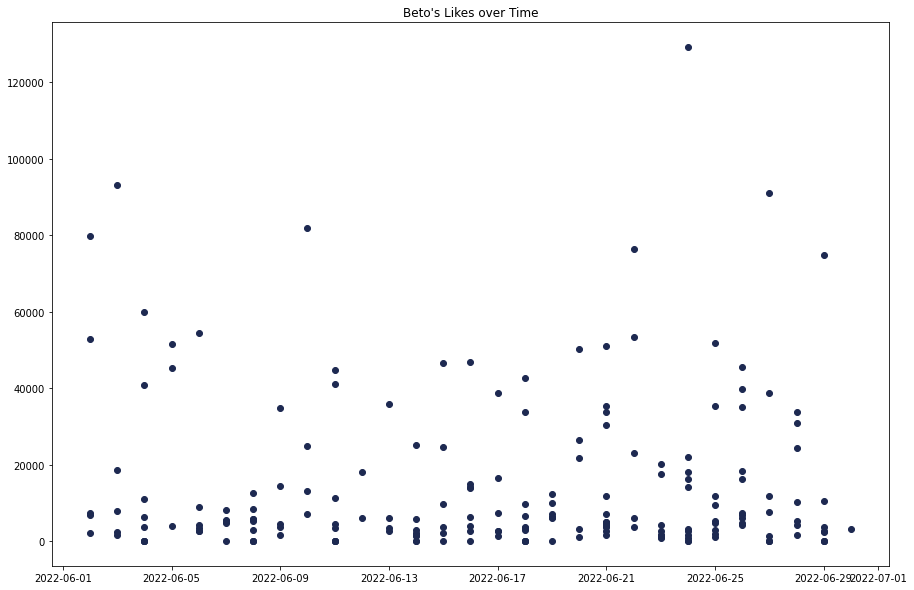

In [109]:
#look at beto's likes over time
lks = num_likes(list_tweets)
dated_plot("Beto's Likes over Time", lks, "Created_At", "Likes", None, '#1D2951', True)
#plt.savefig("/Users/sejalgupta/Documents/BETO WORK/twitter/lks_time.jpg")

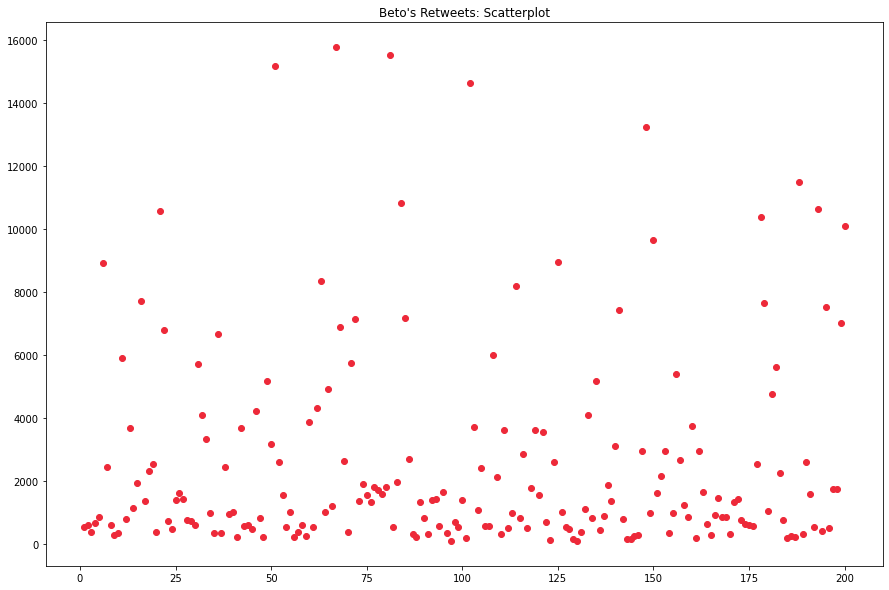

In [107]:
#create plots 
def enumerate_plot(title, df, y_col, l, col):
    """
    title: string w title of plot
    line: 'dashed', line, other line type, or None
    col: hex code w desired color
    Returns a simple plot that only looks at one metric without an x-axis
    """
    plt.rcParams["figure.figsize"]=15,10
    x_lst, y_lst = create_xy_list(df, None, y_col)
    plt.title(title)
    #print(y_lst)
    if l == None:
        plt.plot(x_lst, y_lst, 'o', color = col)
    else:
        plt.plot(x_lst, y_lst, marker = 'o', linestyle = l, color = col)

#enumerate_plot("Beto's Retweets", rts, "Retweets", 'dashed', '#ED2939')
enumerate_plot("Beto's Retweets: Scatterplot", rts, "Retweets", None, '#ED2939')